<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#REGRESSION" data-toc-modified-id="REGRESSION-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>REGRESSION</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-Model" data-toc-modified-id="Linear-Regression-Model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Linear Regression Model</a></span></li><li><span><a href="#Multiple-Linear-Regression-Model" data-toc-modified-id="Multiple-Linear-Regression-Model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Multiple Linear Regression Model</a></span></li><li><span><a href="#Logistik-Regression-Model" data-toc-modified-id="Logistik-Regression-Model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Logistik Regression Model</a></span></li></ul></li></ul></div>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# REGRESSION

* Linear Regression Model
* Multiple Linear Regression Model
* Logistik Regression Model

## Linear Regression Model

**Data Exploration**

In [25]:
crime = pd.read_csv('crime.csv', index_col=0)
crime.head()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234


Data Description:

- `M`: percentage of males aged 14-24 
- `So`: whether it is in a Southern state. 1 for Yes, 0 for No.
- `Ed`: mean years of schooling
- `Po1`: police expenditure in 1960
- `Po2`: police expenditure in 1959 
- `LF	`: labour force participation rate
- `M.F	`: number of males per 1000 females
- `Pop`: state population
- `NW`: number of non-whites resident per 1000 people
- `U1`: unemployment rate of urban males aged 14-24
- `U2`: unemployment rate of urban males aged 35-39
- `gdp`: gross domestic product per head
- `Ineq`: income inequality
- `Prob`: probability of imprisonment
- `time`: avg time served in prisons
- `y`: crime rate in an unspecified category Produce a linear

**Check any missing value**

crime.isna().sum()

crime.dropna()

**Visualize Data**

In [26]:
df = pd.DataFrame(crime) # Your data 
corr = df.corr() # Calculates correlation matrix

<AxesSubplot:>

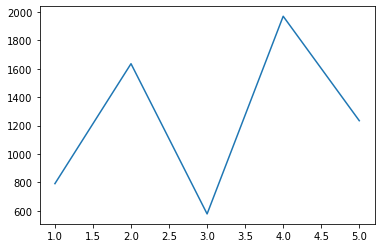

In [27]:
crime['y'].head().plot()

In [28]:
crime.head()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234


In [29]:
corr

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
M,1.000000,0.584355,-0.530240,-0.505737,-0.513173,-0.160949,-0.028680,-0.280638,0.593198,-0.224381,-0.244843,-0.670055,0.639211,0.361116,0.114511,-0.089472
So,0.584355,1.000000,-0.702741,-0.372636,-0.376168,-0.505469,-0.314733,-0.049918,0.767103,-0.172419,0.071693,-0.636945,0.737181,0.530862,0.066813,-0.090637
Ed,-0.530240,-0.702741,1.000000,0.482952,0.499410,0.561178,0.436915,-0.017227,-0.664882,0.018103,-0.215682,0.735997,-0.768658,-0.389923,-0.253974,0.322835
Po1,-0.505737,-0.372636,0.482952,1.000000,0.993586,0.121493,0.033760,0.526284,-0.213709,-0.043698,0.185093,0.787225,-0.630500,-0.473247,0.103358,0.687604
Po2,-0.513173,-0.376168,0.499410,0.993586,1.000000,0.106350,0.022843,0.513789,-0.218768,-0.051712,0.169224,0.794262,-0.648152,-0.473027,0.075627,0.666714
LF,-0.160949,-0.505469,0.561178,0.121493,0.106350,1.000000,0.513559,-0.123672,-0.341214,-0.229400,-0.420762,0.294632,-0.269886,-0.250086,-0.123640,0.188866
M.F,-0.028680,-0.314733,0.436915,0.033760,0.022843,0.513559,1.000000,-0.410628,-0.327305,0.351892,-0.018692,0.179609,-0.167089,-0.050858,-0.427697,0.213914
Pop,-0.280638,-0.049918,-0.017227,0.526284,0.513789,-0.123672,-0.410628,1.000000,0.095153,-0.038120,0.270422,0.308263,-0.126294,-0.347289,0.464210,0.337474
NW,0.593198,0.767103,-0.664882,-0.213709,-0.218768,-0.341214,-0.327305,0.095153,1.000000,-0.156450,0.080908,-0.590107,0.677313,0.428059,0.230398,0.032599
U1,-0.224381,-0.172419,0.018103,-0.043698,-0.051712,-0.229400,0.351892,-0.038120,-0.156450,1.000000,0.745925,0.044857,-0.063832,-0.007469,-0.169853,-0.050478


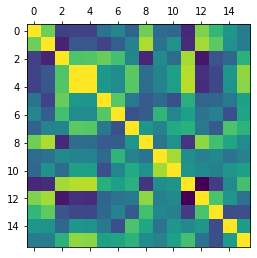

In [30]:
plt.matshow(corr)

In [34]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [35]:
fig = px.imshow(corr)

NameError: name 'px' is not defined

In [36]:
fig.show()

NameError: name 'fig' is not defined

In [37]:
crime.shape

(47, 16)

**Making Model**

<AxesSubplot:xlabel='GDP', ylabel='y'>

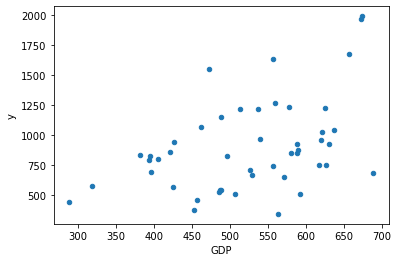

In [38]:
crime.plot.scatter(x='GDP', y='y')

**Library sklearn**

In [39]:
from sklearn.linear_model import LinearRegression

**Prediktor & Target**

In [40]:
y = crime['y']

In [41]:
x = crime[['GDP']]

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(x,y)

LinearRegression()

**Slope ($\alpha$) & Intercept ($\beta$)**

Garis atau tren linear yang didapatkan dari model regresi linear secara matematis didapatkan dari persamaan berikut:

$$
y = \alpha + \beta\ x \\
y = \alpha + \beta\ Prob
$$

- y: target variabel
- $\alpha$: intercept
- $\beta$: slope atau koefisien
- x: prediktor

In [44]:
lm.intercept_

-24.28260904772344

In [45]:
lm.coef_

array([1.76893381])

**Visualize Model**

In [46]:
import seaborn as sns

<AxesSubplot:xlabel='GDP', ylabel='y'>

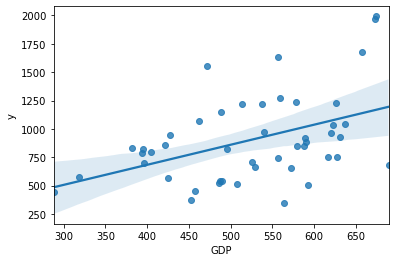

In [47]:
sns.regplot(x = 'GDP', y = 'y', data=crime)

**Distribusi Error / Residual**

Menunjukkan distribusi atau persebaran dari nilai error (perbedaan hasil prediksi dengan data aktual)

score merupakan $R^2$, 
$$
R^2 = (1 - \frac{u}{v} )
$$
$u$ adalah jumlah sisa kuadrat \
`((y_true - y_pred) ** 2).sum()`\
\
$v$ adalah adalah jumlah total kotak \
`((y_true - y_true.mean()) ** 2).sum()`

In [48]:
lm.score(X = x, y = y)

0.19476329736192421

## Multiple Linear Regression Model

Masih menggunakan data set `crime`

In [49]:
crime.head()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234


In [50]:
fig.show()

NameError: name 'fig' is not defined

In [51]:
x_mlm = crime.drop('y',axis=1)
y_mlm = crime['y']

**Split Model**

In [52]:
from sklearn.model_selection import train_test_split as tts

In [53]:
X_train, X_test, y_train, y_test = tts(x_mlm, y_mlm, test_size=0.2, shuffle=True)


In [54]:
X_train

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time
38,133,0,104,51,47,599,1024,7,40,99,27,425,225,0.053998,16.6999
47,130,0,121,90,91,623,1049,3,22,113,40,588,160,0.052802,16.0997
17,143,0,110,66,63,537,977,10,6,114,35,487,166,0.076299,19.1002
14,135,0,117,62,61,595,986,22,46,77,27,529,190,0.053200,21.5010
46,126,0,104,106,97,599,989,40,24,78,25,593,171,0.046598,16.6999
16,142,1,88,81,77,497,956,33,321,116,47,427,247,0.052099,26.0991
23,132,0,96,87,83,564,953,43,92,83,32,513,227,0.030700,25.1989
20,125,0,108,113,105,567,985,78,94,130,58,626,166,0.034801,26.4010
12,134,0,108,75,71,595,972,47,59,83,31,580,172,0.031201,34.2984
30,166,1,89,58,54,521,973,46,254,72,26,396,237,0.075298,28.3011


**Make Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
mlm = LinearRegression()


In [ ]:
mlm.fit(X_train,y_train)

In [ ]:
pd.DataFrame(mlm.coef_).T

In [ ]:
mlm.intercept_

**Residual**

In [ ]:
from yellowbrick.regressor import ResidualsPlot

In [ ]:
mlm_viz = LinearRegression()

In [ ]:
visualizer = ResidualsPlot(mlm_viz, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

**Choose Columns**

In [ ]:
sfs = SequentialFeatureSelector(mlm)

In [ ]:
sfs.fit(X_train,y_train)

In [ ]:
cond = sfs.get_support()

In [ ]:
pd.DataFrame(sfs.get_support()).T

In [ ]:
name = crime.columns

In [ ]:
def subsetting(cond, name):
    new_name = []
    for i in range(len(cond)):
        condition = bool(cond[i])
        if condition:
            new_name.append(name[i])
    return new_name

In [ ]:
pd.array(subsetting(cond,name))

**Cek Asumsi Model**

**Linearity**

Linearity artinya target variabel dengan prediktornya memiliki hubungan yang linear atau hubungannya bersifat garis lurus. Selain itu, efek atau nilai koefisien antar variabel bersifat additive. Jika linearity ini tidak terpenuhi, maka automatis semua nilai koefisien yang kita dapatkan tidak valid karena model berasumsi bahwa pola yang akan kita buat adalah linear.

Model linear

$$
price = 2000 + 7500\times carat + 1500\times depth
$$

Model non-linear

$$
price = 2000 + 7500\times carat + 500\times carat^2
$$

Hubungan linear antara target dan prediktor juga dapat dilihat melalui korelasi antar variabelnya.

**Normality**

Residual atau error dari data perlu berdistribusi normal. Ketika kita membuat sebuah model regresi linear, persamaan yang akan kita dapat adalah sebagai berikut:

$$
y = \alpha + \beta\times x + \epsilon \\
\epsilon \sim Normal(0, \sigma)
$$

Tanda e ($\epsilon$) atau epsilon di belakang menunjukkan adanya error atau residual yang tidak ditangkap model. Model berasumsi bahwa error ini memiliki distribusi normal yang berpusat di angka 0. Untuk memeriksa distribusi dari nilai residual apakah berdistribusi normal (membentuk kurva lonceng) atau tidak, kita bisa menggunakan histogram.

**Homocesdasticity**

Homocesdasticity menunjukkan bahwa residual atau error bersifat konstan atau tidak membentuk pola tertentu. Jika error membentuk pola tertentu seperti garis linear atau mengerucut, maka kita sebut dengan `Heterocesdasticity` dan akan berpengaruh pada nilai standard error pada estimate/koefisien prediktor yan bias (terlalu sempit atau terlalu lebar).

uji statistik Bresuch-Pagan

**Multicolinearity**

Multikolinearitas terjadi ketika antar variabel prediktor yang digunakan pada model memiliki hubungan yang kuat. Ada atau tidak multikolinearitas dapat dilihat dari nilai VIF(Variance Inflation Factor). VIF merupakan ukuran yang menjelaskan seberapa besar variansi koefisien yang meningkat karena multikolinieritas

Ketika nilai VIF lebih dari 10 artinya terjadi multikolinearitas. Jika hal tersebut terjadi, bisa dipilih salah satu variabel yang dibuang dari model yang memiliki VIF > 10.

Asumsi:

- Antara target variabel dan prediktor ada korelasi
- Antara prediktor dengan prediktor lain tidak ada korelasi


## Logistik Regression Model

**Data Input**

In [10]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Cek NA**

insurance.isna().sum()

**Data Exploratory**

In [11]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
clean_ins = pd.get_dummies(insurance)

In [13]:
clean_ins.drop(['sex_male','smoker_no'], axis=1, inplace=True)

In [14]:
clean_ins

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,0,0,0,1


In [15]:
x_ins = clean_ins.drop('smoker_yes', axis=1)
y_ins = clean_ins['smoker_yes']

In [16]:
clean_ins.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

In [18]:
ins_X_train, ins_X_test, ins_y_train, ins_y_test = tts(x_ins, y_ins, test_size=0.2, shuffle=True)


In [ ]:
lrm = LogisticRegression()
lrm.fit(X = ins_X_train, y = ins_y_train)

In [ ]:
pd.DataFrame(lrm.coef_)

In [ ]:
lrm.intercept_

In [ ]:
pd.DataFrame({'pred' : lrm.predict(X = ins_X_test),\
              'actual' : ins_y_test}\
            ).head(20)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(lrm.predict(X = ins_X_test),\
                ins_y_test)

In [ ]:
0,0  0,1
1,0  1,1

              Predicted Class
              _______________
             |
Actual Class |
             |

In [ ]:
pred_tune = lrm.predict_proba(ins_X_test)

0.35 (boundary cond)\

kalau lebih besar jadi True

In [ ]:
pred_tune[:,1] >= 0.35